In [35]:
import pandas as pd
from sklearn.datasets import load_iris

In [49]:
iris = load_iris()

In [51]:
dir(digits)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
digits.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
digits.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [79]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [83]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [85]:
df['flower'] = df.target.apply(lambda x: iris.target_names[x])

In [87]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df0= df[:50]
df1= df[50:100]
df2= df[100:150]

## Sepal length vs Sepal Width (Setosa vs Versicolor)

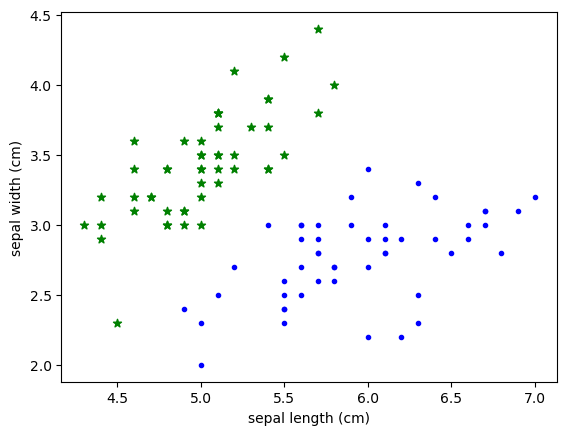

In [95]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')

## Petal length vs Pepal Width (Setosa vs Versicolor)

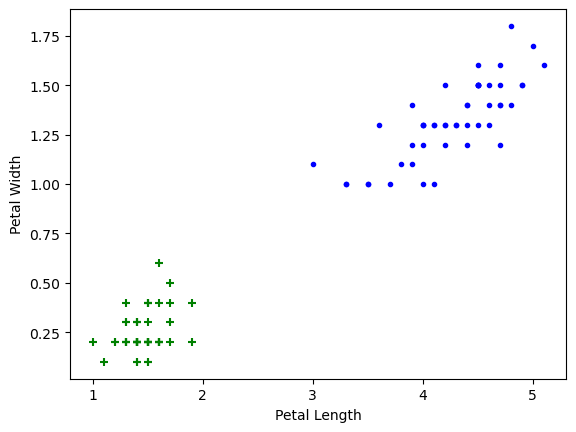

In [105]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

## Train Using Support Vector Machine (SVM)

In [114]:
from sklearn.model_selection import train_test_split

In [118]:
x = df.drop(['target', 'flower'], axis = 'columns')
y = df.target

In [130]:
X_train,X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [132]:
len(X_train)

120

In [134]:
len(X_test)

30

In [136]:
from sklearn.svm import SVC
model = SVC()

In [138]:
model.fit(X_train, Y_train)

SVC()

In [142]:
model.score(X_test, Y_test)

1.0

In [144]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Idrees\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

### Tune parameters

1. Regularization (C)

In [163]:
model_c = SVC(C = 11)
model_c.fit(X_train, Y_train)
model_c.score(X_test, Y_test)

0.9666666666666667

In [167]:
model_c = SVC(C = 1)
model_c.fit(X_train, Y_train)
model_c.score(X_test, Y_test)

1.0

### GAMMA

In [170]:
model_g = SVC(gamma = 10)
model_g.fit(X_train, Y_train)
model_g.score(X_test,Y_test)

0.9666666666666667

### Kernel

In [183]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, Y_train)
model_linear_kernal.score(X_test, Y_test)

1.0